<a href="https://colab.research.google.com/github/ShreyaJV/AIMLMonth2023/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
path = '/content/drive/MyDrive/dataset/ott_churn_model_dataset.csv'
data = pd.read_csv(path)
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2020,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2020,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2020,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2020,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2020,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2020,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2020,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2020,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


# **EDA**

In [64]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2020.0,554887.16250,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.69218,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2020.0,100198.00000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,328634.75000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2020.0,567957.50000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2020.0,773280.25000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2020.0,999961.00000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [65]:
data.isna().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [66]:
data.gender.value_counts()

Male      1053
Female     923
Name: gender, dtype: int64

In [67]:
data.gender.fillna('other', inplace = True)

In [68]:
data[data.duplicated()]

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn


In [69]:
data.maximum_days_inactive.fillna(data.maximum_days_inactive.mode()[0], inplace = True)

In [70]:
data.churn.fillna(1.0,inplace = True)

In [71]:
gender_data = pd.get_dummies(data.gender)
gender_data

,Female,Male,other
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1995,1,0,0
1996,0,1,0
1997,0,0,1
1998,0,1,0


In [72]:
data = pd.concat([data,gender_data], axis = 1)
data

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,Female,Male,other
0,2020,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,1,0,0
1,2020,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,1,0,0
2,2020,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,1,0,0
3,2020,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,1,0,0
4,2020,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,1.0,1,0,0
1996,2020,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,0,1,0
1997,2020,998474,353-2080,other,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,0,0,1
1998,2020,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0,0,1,0


In [73]:
data.replace({'no':0,'yes':1}, inplace = True)

In [74]:
data.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
Female                      uint8
Male                        uint8
other                       uint8
dtype: object

In [75]:
data.drop('phone_no', axis=1, inplace = True)
data.dtypes

year                        int64
customer_id                 int64
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
Female                      uint8
Male                        uint8
other                       uint8
dtype: object

In [76]:
for i in range(len(data)):
    age = data.loc[i, 'age']
    if age <= 18:
        data.loc[i, 'age_group'] = 'Under 18'
    elif 19 <= age <= 25:
        data.loc[i, 'age_group'] = '19-25'
    elif 26 <= age <= 35:
        data.loc[i, 'age_group'] = '26-35'
    elif 36 <= age <= 45:
        data.loc[i, 'age_group'] = '36-45'
    elif 46 <= age <= 60:
        data.loc[i, 'age_group'] = '46-60'
    else:
        data.loc[i, 'age_group'] = 'over 60'

In [77]:
age_group_mapping = {
    'Under 18': 1,
    '19-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-60': 5,
    'over 60': 6
}

data['age_group_numeric'] = data['age_group'].map(age_group_mapping).astype(float)

In [78]:
data.dtypes

year                        int64
customer_id                 int64
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
Female                      uint8
Male                        uint8
other                       uint8
age_group                  object
age_group_numeric         float64
dtype: object

% of Respective columns generating churn

In [79]:
y = data.churn

In [80]:
X = data.drop(['churn'], axis=1)

In [81]:
print(X.shape, y.shape)

(2000, 19) (2000,)


In [82]:
from collections import Counter

In [83]:
def per_count(x):
    counter=Counter(x)
    pt=[list(counter.keys()),list(counter.values())]
    Count = data.churn.value_counts()
    data2 = pd.DataFrame(np.array(pt).T, columns=['Churn','Count'])
    data2['Count'] = data2['Count'].astype('int64')
    data2['%'] = round(data2['Count'] / x.shape[0] * 100, 2)
    return data2.sort_values('Count',ascending=False)

In [84]:
per_count(y)

,Churn,Count,%
0,0.0,1703,85.15
1,1.0,297,14.85


In [85]:
gender_churn= (data.groupby('gender')['churn'].mean())*100

In [86]:
gender_churn

gender
Female    15.167931
Male      14.719848
other      8.333333
Name: churn, dtype: float64

In [87]:
data['Female'].value_counts()

0    1077
1     923
Name: Female, dtype: int64

In [88]:
data['Male'].value_counts()

1    1053
0     947
Name: Male, dtype: int64

In [89]:
data['other'].value_counts()

0    1976
1      24
Name: other, dtype: int64

In [90]:
df = data.groupby(['Female','churn'], sort=False).size().reset_index(name='Count')
print (df)

   Female  churn  Count
0       1    0.0    783
1       1    1.0    140
2       0    1.0    157
3       0    0.0    920


In [91]:
dm = data.groupby(['Male','churn'], sort=False).size().reset_index(name='Count')
print (dm)

   Male  churn  Count
0     0    0.0    805
1     0    1.0    142
2     1    0.0    898
3     1    1.0    155


In [92]:
do = data.groupby(['other','churn'], sort=False).size().reset_index(name='Count')
print (do)

   other  churn  Count
0      0    0.0   1681
1      0    1.0    295
2      1    1.0      2
3      1    0.0     22


In [93]:
percent_cf= ((140/923)*100)
print(percent_cf)

15.167930660888407


In [94]:
percent_cm= ((155/1053)*100)
print(percent_cm)

14.719848053181387


In [95]:
percent_co= ((2/24)*100)
print(percent_co)

8.333333333333332


In [96]:
percent_chf= ((140/2000)*100)
print(percent_chf)

7.000000000000001


In [97]:
percent_chm= ((155/2000)*100)
print(percent_chm)

7.75


In [98]:
percent_cho= ((2/2000)*100)
print(percent_cho)

0.1


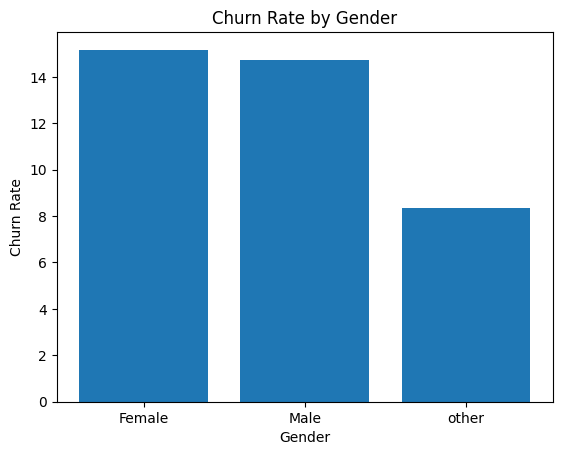

In [99]:
plt.bar(gender_churn.index, gender_churn.values)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

In [100]:
data.age_group_numeric.value_counts()

4.0    761
3.0    697
5.0    322
2.0    131
6.0     86
1.0      3
Name: age_group_numeric, dtype: int64

In [101]:
age_churn = (data.groupby('age_group_numeric')['churn'].mean())*100

In [102]:
age_churn

age_group_numeric
1.0    33.333333
2.0    15.267176
3.0    14.777618
4.0    14.586071
5.0    14.285714
6.0    18.604651
Name: churn, dtype: float64

In [103]:
dAge = data.groupby(['age_group_numeric','churn'], sort=False).size().reset_index(name='Count')
print (dAge)

    age_group_numeric  churn  Count
0                 4.0    0.0    650
1                 6.0    1.0     16
2                 2.0    0.0    111
3                 3.0    1.0    103
4                 5.0    0.0    276
5                 4.0    1.0    111
6                 6.0    0.0     70
7                 3.0    0.0    594
8                 2.0    1.0     20
9                 5.0    1.0     46
10                1.0    0.0      2
11                1.0    1.0      1


In [104]:
percent_cAge1= ((1/3)*100)
print(percent_cAge1)

33.33333333333333


In [105]:
percent_cAge2= ((20/131)*100)
print(percent_cAge1)

33.33333333333333


In [106]:
percent_cAge3= ((103/697)*100)
print(percent_cAge3)

14.777618364418938


In [107]:
percent_cAge4= ((111/761)*100)
print(percent_cAge4)

14.586070959264127


In [108]:
percent_cAge5= ((46/322)*100)
print(percent_cAge5)

14.285714285714285


In [109]:
percent_cAge6= ((16/86)*100)
print(percent_cAge6)

18.6046511627907


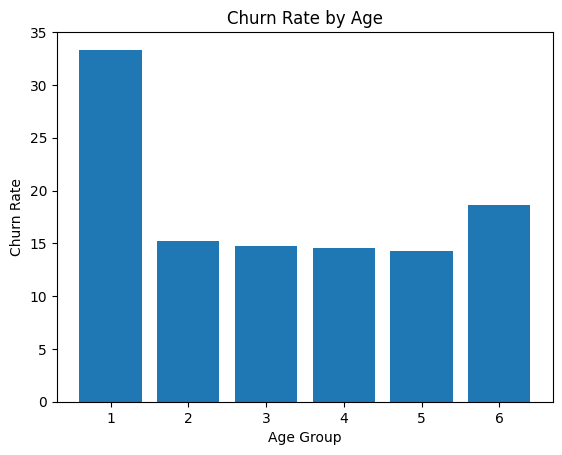

In [110]:
plt.bar(age_churn.index, age_churn.values)
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age')
plt.show()

In [111]:
data.mail_subscribed.value_counts()

0    1430
1     570
Name: mail_subscribed, dtype: int64

In [112]:
mail_churn = (data.groupby('mail_subscribed')['churn'].mean())*100

In [113]:
mail_churn

mail_subscribed
0    16.573427
1    10.526316
Name: churn, dtype: float64

In [114]:
dMail = data.groupby(['mail_subscribed','churn'], sort=False).size().reset_index(name='Count')
print (dMail)

   mail_subscribed  churn  Count
0                0    0.0   1193
1                0    1.0    237
2                1    0.0    510
3                1    1.0     60


In [115]:
percent_cMail0= ((237/1430)*100)
print(percent_cMail0)

16.573426573426573


In [116]:
percent_cMail1= ((60/570)*100)
print(percent_cMail1)

10.526315789473683


In [117]:
avg_mins = data['minimum_daily_mins'].mean()
avg_mins

10.1987

In [118]:
avg_max = data['maximum_daily_mins'].mean()
avg_max

30.62078

In [119]:
churned = data[data['churn'] == 1]
sum_column1 = churned['weekly_mins_watched'].sum()
sum_column2 = churned['weekly_max_night_mins'].sum()
rows_churned= len(churned)
print(rows_churned)
tot_sum = sum_column1+sum_column2
print("Total weekly minutes watched by 297 people",tot_sum)

297
Total weekly minutes watched by 297 people 119491.45


In [120]:
avg_weekly_churned= ((tot_sum)/rows_churned)
print(avg_weekly_churned)

402.32811447811446


In [121]:
threshold = 402.32  # Adjust this threshold value as needed

# Calculate the total time spent by each customer
data['total_time_spent'] = data['weekly_mins_watched'] + data['minimum_daily_mins'] + data['maximum_daily_mins'] + data['weekly_max_night_mins']

# Create two new columns: one for the sum and one for the average of daily and weekly minutes watched
data['total_weekly_mins'] = data['weekly_mins_watched'] + data['weekly_max_night_mins']
data['total_daily_mins'] = data['minimum_daily_mins'] + data['maximum_daily_mins']

# Create a binary column 'time_threshold_exceeded' based on the threshold
data['time_threshold_exceeded'] = (data['total_time_spent'] > threshold).astype(int)


In [122]:
mean_videos_watched = data['videos_watched'].mean()

print("Mean Number of Videos Watched:", mean_videos_watched)

Mean Number of Videos Watched: 4.4825


In [123]:
data

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,...,churn,Female,Male,other,age_group,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded
0,2020,100198,Female,36,62,0,0,148.35,12.2,16.81,...,0.0,1,0,0,36-45,4.0,259.36,230.35,29.01,0
1,2020,100643,Female,39,149,0,0,294.45,7.7,33.37,...,0.0,1,0,0,36-45,4.0,422.52,381.45,41.07,1
2,2020,100756,Female,65,126,0,0,87.30,11.9,9.89,...,1.0,1,0,0,over 60,6.0,200.09,178.30,21.79,0
3,2020,101595,Female,24,131,0,1,321.30,9.5,36.41,...,0.0,1,0,0,19-25,2.0,469.21,423.30,45.91,1
4,2020,101653,Female,40,191,0,0,243.00,10.9,27.54,...,0.0,1,0,0,36-45,4.0,364.44,326.00,38.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,Female,54,75,0,1,182.25,11.3,20.66,...,1.0,1,0,0,46-60,5.0,311.21,279.25,31.96,0
1996,2020,998086,Male,45,127,0,0,273.45,9.3,30.99,...,0.0,0,1,0,36-45,4.0,429.74,389.45,40.29,1
1997,2020,998474,other,53,94,0,0,128.85,15.6,14.60,...,0.0,0,0,1,46-60,5.0,269.05,238.85,30.20,0
1998,2020,998934,Male,40,94,0,0,178.05,10.4,20.18,...,0.0,0,1,0,36-45,4.0,308.63,278.05,30.58,0


In [124]:
crosstab = pd.crosstab(data['time_threshold_exceeded'], data['churn'])
print(crosstab)

churn                    0.0  1.0
time_threshold_exceeded          
0                        803  113
1                        900  184


In [125]:
data.maximum_days_inactive.value_counts()

3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [126]:
inactive_churn = (data.groupby('maximum_days_inactive')['churn'].mean())*100
inactive_churn

maximum_days_inactive
0.0    10.000000
1.0     8.333333
2.0    12.087912
3.0    14.594039
4.0    16.124031
5.0    17.647059
6.0    50.000000
Name: churn, dtype: float64

In [127]:
dInactive = data.groupby(['maximum_days_inactive','churn'], sort=False).size().reset_index(name='Count')
print (dInactive)

    maximum_days_inactive  churn  Count
0                     4.0    0.0    541
1                     3.0    0.0    831
2                     4.0    1.0    104
3                     3.0    1.0    142
4                     2.0    0.0    240
5                     5.0    0.0     70
6                     2.0    1.0     33
7                     1.0    0.0     11
8                     0.0    0.0      9
9                     5.0    1.0     15
10                    0.0    1.0      1
11                    6.0    0.0      1
12                    6.0    1.0      1
13                    1.0    1.0      1


In [128]:
data['engagement_score'] = data['weekly_mins_watched'] + data['minimum_daily_mins']

# Define thresholds for categorizing engagement levels
high_engagement_threshold = 300
low_engagement_threshold = 100

# Categorize users based on engagement levels
data['engagement_segment'] = np.where(data['engagement_score'] >= high_engagement_threshold, 'High Engagement', 'Low Engagement')
data['engagement_segment'] = np.where(data['engagement_score'] <= low_engagement_threshold, 'Low Engagement', data['engagement_segment'])

# Calculate churn rates within each engagement segment
engagement_churn_rates = (data.groupby('engagement_segment')['churn'].mean())*100

# Print the results
print("Engagement Segment Churn Rates:")
print(engagement_churn_rates)

Engagement Segment Churn Rates:
engagement_segment
High Engagement    19.268293
Low Engagement     11.779661
Name: churn, dtype: float64


In [129]:
data.replace({'Low Engagement':0,'High Engagement':1}, inplace = True)

In [130]:
churned_with_calls = data[(data['churn'] == 1) & (data['customer_support_calls'] > 0)]
num_churned_with_calls = len(churned_with_calls)
num_churned_with_calls

243

In [131]:
data.dtypes

year                         int64
customer_id                  int64
gender                      object
age                          int64
no_of_days_subscribed        int64
multi_screen                 int64
mail_subscribed              int64
weekly_mins_watched        float64
minimum_daily_mins         float64
maximum_daily_mins         float64
weekly_max_night_mins        int64
videos_watched               int64
maximum_days_inactive      float64
customer_support_calls       int64
churn                      float64
Female                       uint8
Male                         uint8
other                        uint8
age_group                   object
age_group_numeric          float64
total_time_spent           float64
total_weekly_mins          float64
total_daily_mins           float64
time_threshold_exceeded      int64
engagement_score           float64
engagement_segment           int64
dtype: object

In [132]:
data.drop('gender', axis=1, inplace = True)

In [133]:
data.drop('age_group', axis=1, inplace = True)

In [134]:
data.dtypes

year                         int64
customer_id                  int64
age                          int64
no_of_days_subscribed        int64
multi_screen                 int64
mail_subscribed              int64
weekly_mins_watched        float64
minimum_daily_mins         float64
maximum_daily_mins         float64
weekly_max_night_mins        int64
videos_watched               int64
maximum_days_inactive      float64
customer_support_calls       int64
churn                      float64
Female                       uint8
Male                         uint8
other                        uint8
age_group_numeric          float64
total_time_spent           float64
total_weekly_mins          float64
total_daily_mins           float64
time_threshold_exceeded      int64
engagement_score           float64
engagement_segment           int64
dtype: object

In [135]:
data

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
0,2020,100198,36,62,0,0,148.35,12.2,16.81,82,...,1,0,0,4.0,259.36,230.35,29.01,0,160.55,0
1,2020,100643,39,149,0,0,294.45,7.7,33.37,87,...,1,0,0,4.0,422.52,381.45,41.07,1,302.15,1
2,2020,100756,65,126,0,0,87.30,11.9,9.89,91,...,1,0,0,6.0,200.09,178.30,21.79,0,99.20,0
3,2020,101595,24,131,0,1,321.30,9.5,36.41,102,...,1,0,0,2.0,469.21,423.30,45.91,1,330.80,1
4,2020,101653,40,191,0,0,243.00,10.9,27.54,83,...,1,0,0,4.0,364.44,326.00,38.44,0,253.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,54,75,0,1,182.25,11.3,20.66,97,...,1,0,0,5.0,311.21,279.25,31.96,0,193.55,0
1996,2020,998086,45,127,0,0,273.45,9.3,30.99,116,...,0,1,0,4.0,429.74,389.45,40.29,1,282.75,0
1997,2020,998474,53,94,0,0,128.85,15.6,14.60,110,...,0,0,1,5.0,269.05,238.85,30.20,0,144.45,0
1998,2020,998934,40,94,0,0,178.05,10.4,20.18,100,...,0,1,0,4.0,308.63,278.05,30.58,0,188.45,0


In [136]:
data.shape

(2000, 24)

In [137]:
X = data.drop('churn', axis = 1)

In [138]:
Y = data.churn

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
X_res, Y_res = SMOTE().fit_resample(X,Y)

In [141]:
X_res.value_counts()

year  customer_id  age  no_of_days_subscribed  multi_screen  mail_subscribed  weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  weekly_max_night_mins  videos_watched  maximum_days_inactive  customer_support_calls  Female  Male  other  age_group_numeric  total_time_spent  total_weekly_mins  total_daily_mins  time_threshold_exceeded  engagement_score  engagement_segment
2020  100198       36   62                     0             0                148.350000           12.200000           16.810000           82                     1               4.000000               1                       1       0     0      4.000000           259.360000        230.350000         29.010000         0                        160.550000        0                     1
      680910       62   79                     0             0                331.350000           12.200000           37.550000           74                     2               4.000000               1                       1     

In [142]:
Y_res.value_counts()

0.0    1703
1.0    1703
Name: churn, dtype: int64

# **DATA PRE-PROCESSING**

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test, Y_train, Y_test = train_test_split(X_res,Y_res,test_size = 0.2)

In [145]:
X_train

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
2378,2020,108747,45,82,0,0,403.563270,10.912905,45.738765,103,...,0,0,0,4.000000,563.406866,506.755196,56.651670,1,414.476175,1
2152,2020,951286,62,83,0,0,147.926479,11.080104,16.764874,89,...,0,1,0,5.563699,265.263589,237.418612,27.844977,0,159.006583,0
1919,2020,964765,42,67,0,0,316.050000,7.200000,35.820000,83,...,0,1,0,4.000000,442.070000,399.050000,43.020000,1,323.250000,1
3012,2020,147963,37,74,0,0,219.852397,8.922734,24.920994,91,...,0,0,0,4.000000,345.090581,311.246854,33.843728,0,228.775131,0
757,2020,453828,46,74,0,1,231.150000,10.900000,26.200000,57,...,1,0,0,5.000000,325.250000,288.150000,37.100000,0,242.050000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,2020,944853,38,81,0,0,348.751325,9.413004,39.527150,103,...,0,0,0,4.000000,500.800225,451.860071,48.940154,1,358.164329,1
1057,2020,592128,35,163,0,0,286.950000,12.800000,32.520000,121,...,1,0,0,3.000000,453.270000,407.950000,45.320000,1,299.750000,0
140,2020,158478,36,92,1,0,396.450000,9.300000,44.930000,73,...,0,1,0,4.000000,523.680000,469.450000,54.230000,1,405.750000,1
2106,2020,837927,61,116,0,0,139.742528,9.291333,15.835356,117,...,0,1,0,5.347779,282.042563,256.915874,25.126689,0,149.033861,0


In [146]:
X_test

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
2271,2020,730820,34,159,0,0,347.934951,12.224913,39.430557,122,...,0,1,0,3.000000,521.598451,469.942981,51.655470,1,360.159864,1
1154,2020,633877,40,179,0,0,328.800000,6.100000,37.260000,104,...,0,1,0,4.000000,476.160000,432.800000,43.360000,1,334.900000,1
1278,2020,686813,50,104,0,1,420.300000,13.300000,47.630000,102,...,0,1,0,5.000000,583.230000,522.300000,60.930000,1,433.600000,1
2978,2020,944065,38,79,0,0,343.049514,9.144683,38.880945,103,...,0,0,0,4.000000,494.519288,446.493660,48.025628,1,352.194197,1
3298,2020,651129,27,80,0,0,435.051051,4.566657,49.305011,106,...,0,0,0,2.306309,595.355204,541.483536,53.871668,1,439.617708,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,2020,973331,36,119,0,0,334.200000,11.200000,37.880000,112,...,0,1,0,4.000000,495.280000,446.200000,49.080000,1,345.400000,1
2748,2020,626184,38,93,0,0,253.502901,11.769922,28.734671,100,...,0,0,0,3.657552,394.925461,354.420869,40.504593,0,265.272822,0
891,2020,518133,25,94,1,0,255.150000,8.700000,28.920000,78,...,0,1,0,2.000000,370.770000,333.150000,37.620000,0,263.850000,0
21,2020,108471,32,170,0,0,369.600000,9.100000,41.890000,95,...,0,0,1,3.000000,515.590000,464.600000,50.990000,1,378.700000,1


In [147]:
Y_train

2378    1.0
2152    1.0
1919    0.0
3012    1.0
757     0.0
       ... 
2039    1.0
1057    0.0
140     0.0
2106    1.0
1247    0.0
Name: churn, Length: 2724, dtype: float64

In [148]:
Y_test

2271    1.0
1154    0.0
1278    0.0
2978    1.0
3298    1.0
       ... 
1945    0.0
2748    1.0
891     0.0
21      0.0
453     0.0
Name: churn, Length: 682, dtype: float64

# **LOGISTIC REGRESSION**

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
model1 = LogisticRegression()
model1

LogisticRegression()

In [151]:
data.dtypes

year                         int64
customer_id                  int64
age                          int64
no_of_days_subscribed        int64
multi_screen                 int64
mail_subscribed              int64
weekly_mins_watched        float64
minimum_daily_mins         float64
maximum_daily_mins         float64
weekly_max_night_mins        int64
videos_watched               int64
maximum_days_inactive      float64
customer_support_calls       int64
churn                      float64
Female                       uint8
Male                         uint8
other                        uint8
age_group_numeric          float64
total_time_spent           float64
total_weekly_mins          float64
total_daily_mins           float64
time_threshold_exceeded      int64
engagement_score           float64
engagement_segment           int64
dtype: object

In [152]:
data

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
0,2020,100198,36,62,0,0,148.35,12.2,16.81,82,...,1,0,0,4.0,259.36,230.35,29.01,0,160.55,0
1,2020,100643,39,149,0,0,294.45,7.7,33.37,87,...,1,0,0,4.0,422.52,381.45,41.07,1,302.15,1
2,2020,100756,65,126,0,0,87.30,11.9,9.89,91,...,1,0,0,6.0,200.09,178.30,21.79,0,99.20,0
3,2020,101595,24,131,0,1,321.30,9.5,36.41,102,...,1,0,0,2.0,469.21,423.30,45.91,1,330.80,1
4,2020,101653,40,191,0,0,243.00,10.9,27.54,83,...,1,0,0,4.0,364.44,326.00,38.44,0,253.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,54,75,0,1,182.25,11.3,20.66,97,...,1,0,0,5.0,311.21,279.25,31.96,0,193.55,0
1996,2020,998086,45,127,0,0,273.45,9.3,30.99,116,...,0,1,0,4.0,429.74,389.45,40.29,1,282.75,0
1997,2020,998474,53,94,0,0,128.85,15.6,14.60,110,...,0,0,1,5.0,269.05,238.85,30.20,0,144.45,0
1998,2020,998934,40,94,0,0,178.05,10.4,20.18,100,...,0,1,0,4.0,308.63,278.05,30.58,0,188.45,0


In [153]:
model1.fit(X_train, Y_train)

LogisticRegression()

In [154]:
y_pred=model1.predict(X_test)

In [155]:
pred_prob1 = model1.predict_proba(X_test)

In [156]:
model1.score(X_test, Y_test)

0.5997067448680352

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(Y_test,y_pred)

0.5997067448680352

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [160]:
precision_score(Y_test,y_pred)

0.5895953757225434

In [161]:
recall_score(Y_test,y_pred)

0.608955223880597

In [162]:
f1_lr = f1_score(Y_test, y_pred)
f1_lr

0.5991189427312775

In [163]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[205, 142],
       [131, 204]])

Text(0.5, 427.9555555555555, 'Predicted label')

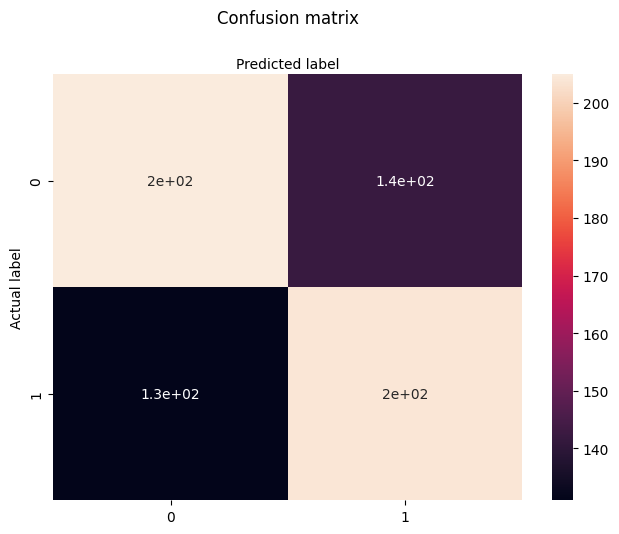

In [164]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [165]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[205, 142],
       [131, 204]])

# **KNN**

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [167]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [168]:
knn.score(X_test, Y_test)


0.6730205278592375

In [169]:
y_pred=knn.predict(X_test)

In [170]:
accuracy_score(Y_test,y_pred)

0.6730205278592375

In [171]:
precision_score(Y_test,y_pred)

0.6666666666666666

In [172]:
recall_score(Y_test,y_pred)

0.6686567164179105

In [173]:
f1_knn = f1_score(Y_test, y_pred)
f1_knn

0.6676602086438151

In [174]:
pred_prob2 = knn.predict_proba(X_test)

In [175]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
cm

array([[235, 112],
       [111, 224]])

Text(58.222222222222214, 0.5, 'Truth')

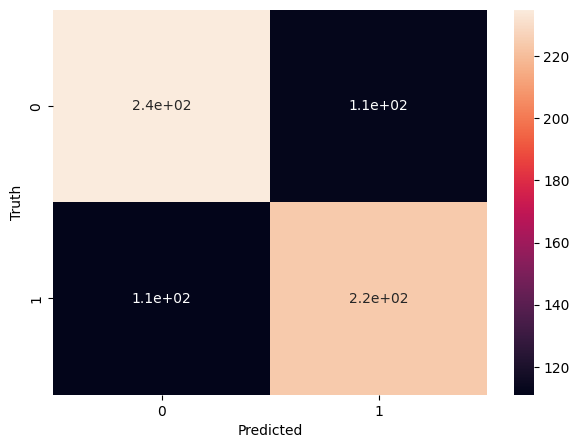

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [177]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       347
         1.0       0.67      0.67      0.67       335

    accuracy                           0.67       682
   macro avg       0.67      0.67      0.67       682
weighted avg       0.67      0.67      0.67       682



#**DECISION TREES**

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
decision_model = DecisionTreeClassifier()
decision_model

DecisionTreeClassifier()

In [180]:
decision_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [181]:
y_pred=decision_model.predict(X_test)

In [182]:
pred_prob3 = decision_model.predict_proba(X_test)

In [183]:
decision_model.score(X_test,Y_test)

0.8709677419354839

In [184]:
accuracy_score(Y_test,y_pred)

0.8709677419354839

In [185]:
precision_score(Y_test,y_pred)

0.8559077809798271

In [186]:
recall_score(Y_test,y_pred)

0.8865671641791045

In [187]:
f1_dt = f1_score(Y_test, y_pred)
f1_dt

0.870967741935484

In [188]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[297,  50],
       [ 38, 297]])

Text(0.5, 427.9555555555555, 'Predicted label')

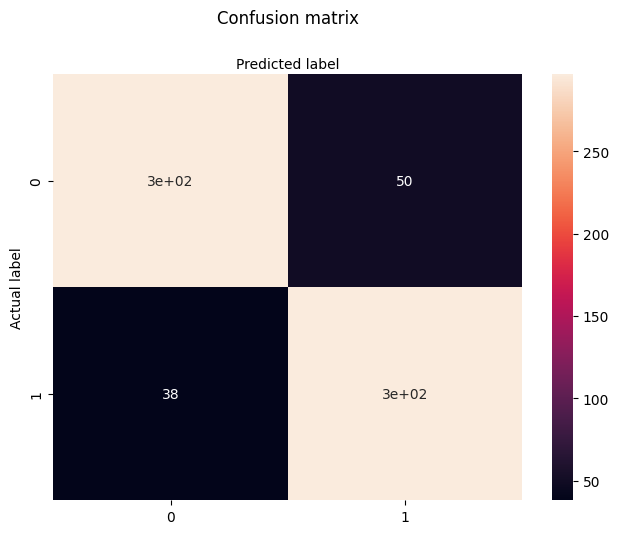

In [189]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **RANDOM FOREST**

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
random_model = RandomForestClassifier()
random_model

RandomForestClassifier()

In [192]:
random_model.fit(X_train,Y_train)

RandomForestClassifier()

In [193]:
y_pred=random_model.predict(X_test)

In [194]:
random_model.score(X_test, Y_test)

0.9237536656891495

In [195]:
accuracy_score(Y_test,y_pred)

0.9237536656891495

In [196]:
precision_score(Y_test,y_pred)

0.9274924471299094

In [197]:
recall_score(Y_test,y_pred)

0.9164179104477612

In [198]:
f1_rf = f1_score(Y_test, y_pred)
f1_rf

0.9219219219219219

In [199]:
pred_prob4 = random_model.predict_proba(X_test)

In [200]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[323,  24],
       [ 28, 307]])

Text(0.5, 427.9555555555555, 'Predicted label')

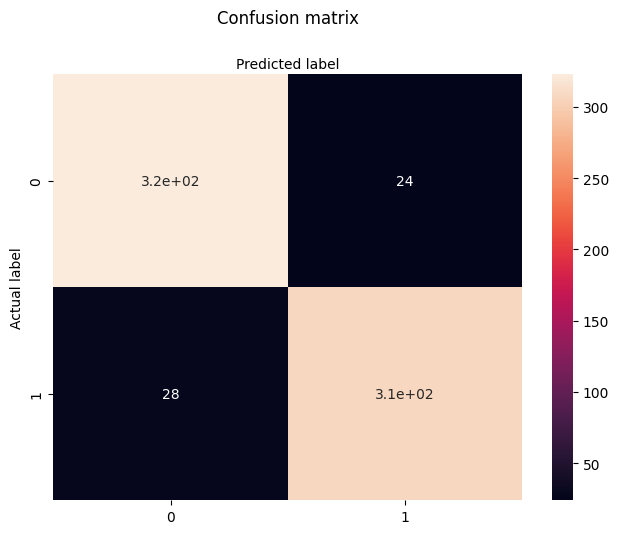

In [201]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **BAGGING AND BOOSTING**

In [202]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [203]:
bagging_model = BaggingClassifier()
bagging_model

BaggingClassifier()

In [204]:
bagging_model.fit(X_train, Y_train)

BaggingClassifier()

In [205]:
y_pred=bagging_model.predict(X_test)

In [206]:
pred_prob5 = bagging_model.predict_proba(X_test)

In [207]:
bagging_model.score(X_test,Y_test)

0.9178885630498533

In [208]:
accuracy_score(Y_test,y_pred)

0.9178885630498533

In [209]:
precision_score(Y_test,y_pred)

0.9345794392523364

In [210]:
recall_score(Y_test,y_pred)

0.8955223880597015

In [211]:
f1_bb = f1_score(Y_test, y_pred)
f1_bb

0.9146341463414633

In [212]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred)
cnf_matrix

array([[326,  21],
       [ 35, 300]])

Text(0.5, 427.9555555555555, 'Predicted label')

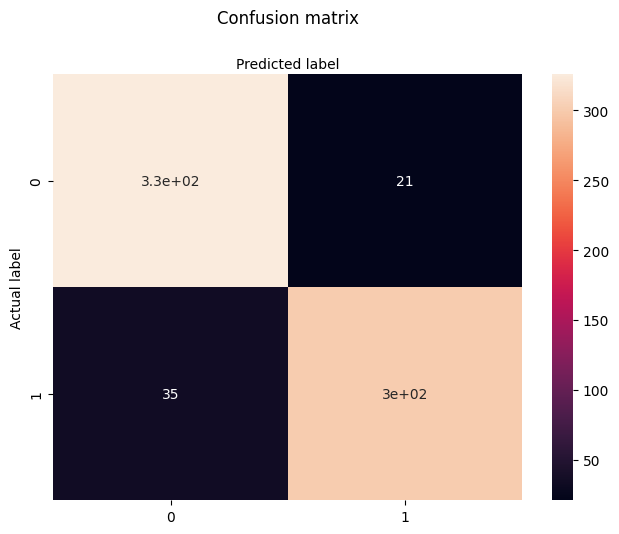

In [213]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **NAIVE BAYES**

In [214]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model_6= GaussianNB()

In [215]:
model_6.fit(X_train,Y_train)

GaussianNB()

In [216]:
predict_train=model_6.predict(X_test)
predict_train

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1.

In [217]:
pred_prob6= model_6.predict_proba(X_test)

In [218]:
model_6.score(X_test,Y_test)

0.6026392961876833

In [219]:
precision_score(Y_test,predict_train)

0.608843537414966

In [220]:
trainaccuracy = accuracy_score(Y_test,predict_train)
print('accuracy score',trainaccuracy)

accuracy score 0.6026392961876833


In [221]:
recall_score(Y_test,predict_train)

0.5343283582089552

In [222]:
from sklearn import metrics
confusion = metrics.confusion_matrix(Y_test,predict_train)
print(confusion)

[[232 115]
 [156 179]]


In [223]:
TP=confusion[1,1] #true positive
TN=confusion[0,0] #true negatives
FP=confusion[0,1] #false positives
FN=confusion[1,0] #false negatives

Text(0.5, 427.9555555555555, 'Predicted label')

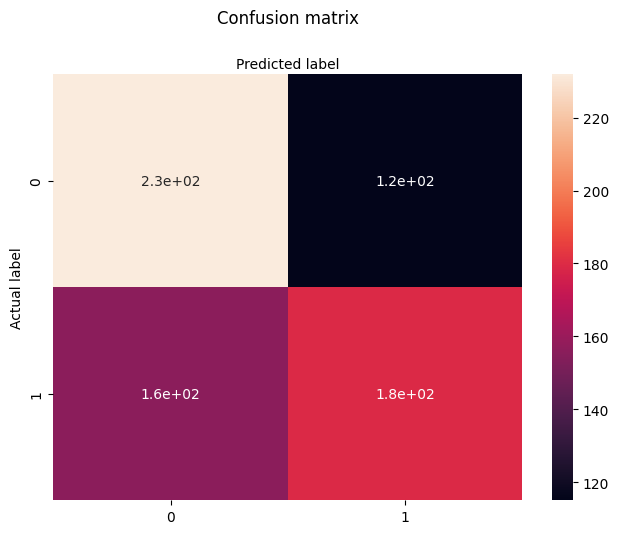

In [224]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [225]:
final_data = pd.DataFrame({'Models': ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'Bagging & Boosting', 'Naive Bayes'],
                           'Score': [model1.score(X_test, Y_test),knn.score(X_test, Y_test),decision_model.score(X_test, Y_test),random_model.score(X_test, Y_test),bagging_model.score(X_test, Y_test),accuracy_score(Y_test,predict_train)]})

In [226]:
final_data

,Models,Score
0,Logistic Regression,0.599707
1,KNN,0.673021
2,Decision Trees,0.870968
3,Random Forest,0.923754
4,Bagging & Boosting,0.917889
5,Naive Bayes,0.602639


##From this we conclude that **Random** **forest** generates score of highest accuracy.

In [227]:
data

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
0,2020,100198,36,62,0,0,148.35,12.2,16.81,82,...,1,0,0,4.0,259.36,230.35,29.01,0,160.55,0
1,2020,100643,39,149,0,0,294.45,7.7,33.37,87,...,1,0,0,4.0,422.52,381.45,41.07,1,302.15,1
2,2020,100756,65,126,0,0,87.30,11.9,9.89,91,...,1,0,0,6.0,200.09,178.30,21.79,0,99.20,0
3,2020,101595,24,131,0,1,321.30,9.5,36.41,102,...,1,0,0,2.0,469.21,423.30,45.91,1,330.80,1
4,2020,101653,40,191,0,0,243.00,10.9,27.54,83,...,1,0,0,4.0,364.44,326.00,38.44,0,253.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,54,75,0,1,182.25,11.3,20.66,97,...,1,0,0,5.0,311.21,279.25,31.96,0,193.55,0
1996,2020,998086,45,127,0,0,273.45,9.3,30.99,116,...,0,1,0,4.0,429.74,389.45,40.29,1,282.75,0
1997,2020,998474,53,94,0,0,128.85,15.6,14.60,110,...,0,0,1,5.0,269.05,238.85,30.20,0,144.45,0
1998,2020,998934,40,94,0,0,178.05,10.4,20.18,100,...,0,1,0,4.0,308.63,278.05,30.58,0,188.45,0


In [228]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(Y_test, pred_prob6[:,1], pos_label=1)


# roc curve for tpr = fpr
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [229]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(Y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(Y_test, pred_prob5[:,1])
auc_score6 = roc_auc_score(Y_test, pred_prob6[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4, auc_score5, auc_score6)

0.6430384102542045 0.7361649963439287 0.8712374725794658 0.9709966020043872 0.9600886059615468 0.6435803690481311


<ipython-input-230-029e0da9a565>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


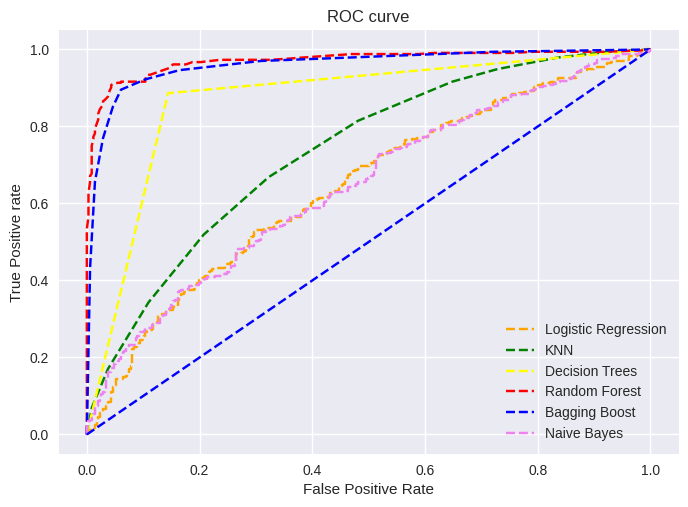

In [230]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Decision Trees')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='blue', label='Bagging Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='violet', label='Naive Bayes')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [231]:
data

,year,customer_id,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,...,Female,Male,other,age_group_numeric,total_time_spent,total_weekly_mins,total_daily_mins,time_threshold_exceeded,engagement_score,engagement_segment
0,2020,100198,36,62,0,0,148.35,12.2,16.81,82,...,1,0,0,4.0,259.36,230.35,29.01,0,160.55,0
1,2020,100643,39,149,0,0,294.45,7.7,33.37,87,...,1,0,0,4.0,422.52,381.45,41.07,1,302.15,1
2,2020,100756,65,126,0,0,87.30,11.9,9.89,91,...,1,0,0,6.0,200.09,178.30,21.79,0,99.20,0
3,2020,101595,24,131,0,1,321.30,9.5,36.41,102,...,1,0,0,2.0,469.21,423.30,45.91,1,330.80,1
4,2020,101653,40,191,0,0,243.00,10.9,27.54,83,...,1,0,0,4.0,364.44,326.00,38.44,0,253.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020,997132,54,75,0,1,182.25,11.3,20.66,97,...,1,0,0,5.0,311.21,279.25,31.96,0,193.55,0
1996,2020,998086,45,127,0,0,273.45,9.3,30.99,116,...,0,1,0,4.0,429.74,389.45,40.29,1,282.75,0
1997,2020,998474,53,94,0,0,128.85,15.6,14.60,110,...,0,0,1,5.0,269.05,238.85,30.20,0,144.45,0
1998,2020,998934,40,94,0,0,178.05,10.4,20.18,100,...,0,1,0,4.0,308.63,278.05,30.58,0,188.45,0


precision-recall curve

In [232]:
from sklearn.metrics import precision_recall_curve

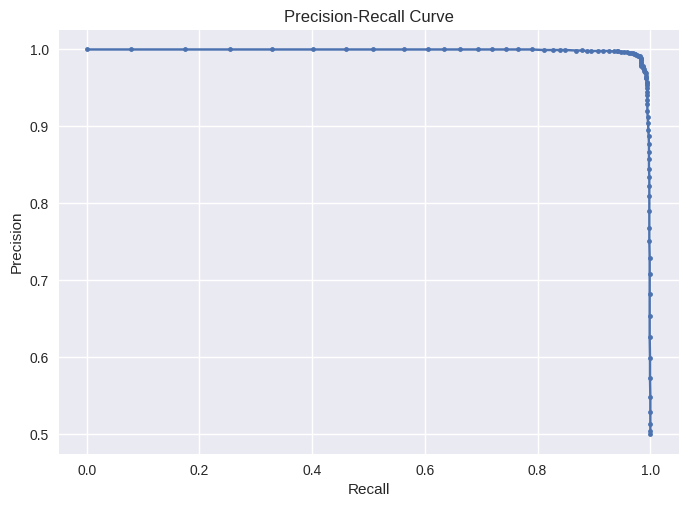

In [233]:
pred_prob_res = random_model.predict_proba(X_res)[:, 1]
precision, recall, thresholds = precision_recall_curve(Y_res, pred_prob_res)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [234]:
threshold = 0.99 # Example threshold, adjust based on your needs

# Classify customers based on the threshold
predicted_classes = (pred_prob_res >= threshold).astype(int)

In [235]:
predicted_classes

array([0, 0, 0, ..., 0, 1, 0])

In [236]:
num_potential_churners = sum(predicted_classes)
print("Number of potential churners:", num_potential_churners)

Number of potential churners: 297


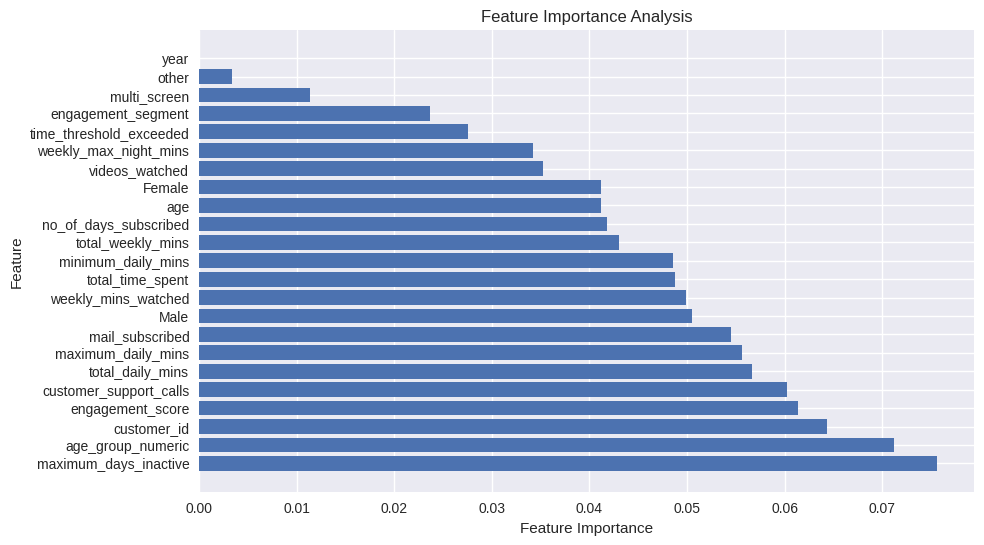

In [237]:
# Get feature importance scores
feature_importances = random_model.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()